In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ps1
from astropy.io import fits
import requests
from io import BytesIO
from astropy.table import Table
import astroquery

In [3]:
df = pd.read_csv('data/UCMGs_Visible.csv')
df

,TARGETID,TARGET_RA,TARGET_DEC
0,39628024701782850,322.585095,9.667930
1,39628005764505116,259.326584,8.964611
2,39628001041712163,334.508051,8.800217
3,39627993613602098,247.022087,8.580139
4,39627977352286907,348.905820,7.868427
...,...,...,...
82,J2146-0821,326.603061,-8.359854
83,J2137-0842,324.430462,-8.708471
84,J2202-0926,330.613662,-9.439911
85,J2337-1006,354.463327,-10.100498


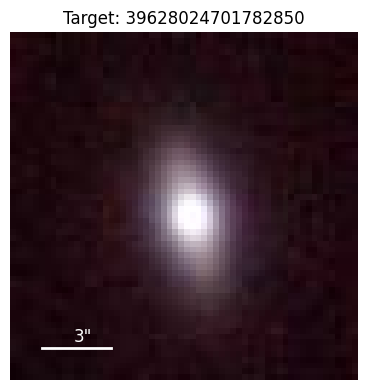

Image saved for GLQ 39628024701782850 at RA: 322.58509453271995, Dec: 9.667929819841


In [15]:
for i, row in df.iterrows():
    if row['TARGET_DEC'] < -30:
        print(f"Skipping GLQ {row['TARGETID']} at RA: {row['TARGET_RA']}, Dec: {row['TARGET_DEC']} (Dec < -30)")
        continue
    im = ps1.getcolorim(
        ra=row['TARGET_RA'],
        dec=row['TARGET_DEC'],
        size=60,
        filters="grizy",  
        # bands=['g', 'r', 'i'],
        # cache=True,
        # verbose=False
    )
    # Display the image
    if im is not None:
        plt.figure(figsize=(4, 4))
        plt.imshow(im, origin='lower')
        plt.title(f"Target: {row['TARGETID']}")
        # at RA: {row['TARGET_RA']:.6f}, Dec: {row['TARGET_DEC']:6f}")

        # Add scale bar annotation with text and line
        plt.annotate(
            f'3"',
            xy=(12, 6),
            fontsize=12,
            color='white',
            # bbox=dict(facecolor='black', alpha=0.5),
            ha='center'
        )
        plt.plot([5, 17], [5, 5], color='white', lw=2)  # Example scale bar line
    

        plt.axis('off')
        plt.tight_layout()
        plt.savefig(f"./figs/UCMGs_Visible/ps1_{row['TARGETID']}.png", bbox_inches='tight')
        # plt.close()
        plt.show()
        print(f"Image saved for GLQ {row['TARGETID']} at RA: {row['TARGET_RA']}, Dec: {row['TARGET_DEC']}")
    else:
        print(f"Image not found for GLQ {row['TARGETID']} at RA: {row['TARGET_RA']}, Dec: {row['TARGET_DEC']}")

    break  # Remove this line to process all rows

In [17]:
from astroquery.mast import Catalogs

In [18]:
catalog_data = Catalogs.query_criteria(coordinates="5.97754 32.53617",
                                       radius=0.01,
                                       catalog="PANSTARRS",
                                       table="mean",
                                       data_release="dr2",
                                       nStackDetections=[("gte", 5)],
                                    #    columns=["objName", "objID", "nStackDetections", "distance"],
                                       sort_by=[("desc", "distance")],
                                       pagesize=15)

In [19]:
catalog_data

objName,objAltName1,objAltName2,objAltName3,objID,uniquePspsOBid,ippObjID,surveyID,htmID,zoneID,tessID,projectionID,skyCellID,randomID,batchID,dvoRegionID,processingVersion,objInfoFlag,qualityFlag,raStack,decStack,raStackErr,decStackErr,raMean,decMean,raMeanErr,decMeanErr,epochMean,posMeanChisq,cx,cy,cz,lambda,beta,l,b,nStackObjectRows,nStackDetections,nDetections,ng,nr,ni,nz,ny,gQfPerfect,gMeanPSFMag,gMeanPSFMagErr,gMeanPSFMagStd,gMeanPSFMagNpt,gMeanPSFMagMin,gMeanPSFMagMax,gMeanKronMag,gMeanKronMagErr,gMeanKronMagStd,gMeanKronMagNpt,gMeanApMag,gMeanApMagErr,gMeanApMagStd,gMeanApMagNpt,gFlags,rQfPerfect,rMeanPSFMag,rMeanPSFMagErr,rMeanPSFMagStd,rMeanPSFMagNpt,rMeanPSFMagMin,rMeanPSFMagMax,rMeanKronMag,rMeanKronMagErr,rMeanKronMagStd,rMeanKronMagNpt,rMeanApMag,rMeanApMagErr,rMeanApMagStd,rMeanApMagNpt,rFlags,iQfPerfect,iMeanPSFMag,iMeanPSFMagErr,iMeanPSFMagStd,iMeanPSFMagNpt,iMeanPSFMagMin,iMeanPSFMagMax,iMeanKronMag,iMeanKronMagErr,iMeanKronMagStd,iMeanKronMagNpt,iMeanApMag,iMeanApMagErr,iMeanApMagStd,iMeanApMagNpt,iFlags,zQfPerfect,zMeanPSFMag,zMeanPSFMagErr,zMeanPSFMagStd,zMeanPSFMagNpt,zMeanPSFMagMin,zMeanPSFMagMax,zMeanKronMag,zMeanKronMagErr,zMeanKronMagStd,zMeanKronMagNpt,zMeanApMag,zMeanApMagErr,zMeanApMagStd,zMeanApMagNpt,zFlags,yQfPerfect,yMeanPSFMag,yMeanPSFMagErr,yMeanPSFMagStd,yMeanPSFMagNpt,yMeanPSFMagMin,yMeanPSFMagMax,yMeanKronMag,yMeanKronMagErr,yMeanKronMagStd,yMeanKronMagNpt,yMeanApMag,yMeanApMagErr,yMeanApMagStd,yMeanApMagNpt,yFlags,distance
str21,str4,str4,str4,int64,int64,int64,uint8,int64,int64,uint8,int64,uint8,float64,int64,int64,uint8,int64,uint8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64
PSO J005.9825+32.5339,-999,-999,-999,147040059824741278,3484765000037929,198423194145832,0,17243336876736,14704,1,2010,12,0.692368710127071,3484765,46199,3,503635968,60,5.98245845,32.53390446,0.0010000000474974513,0.0010000000474974513,5.98247216917467,32.533899733306946,0.0012637911131605506,0.0012808239553123713,56081.70726001986,3.6642649173736572,0.8384818740537362,0.08786866388096336,0.5377985169104771,19.35535035080069,27.288314423440173,116.23935735737624,-29.980132513487835,--,5,58,10,14,9,12,13,0.9996979832649231,20.1028995513916,0.0066999997943639755,0.037992000579833984,7,20.020700454711914,20.126699447631836,20.277000427246094,0.03036700002849102,0.08417800068855286,7,20.215299606323242,0.024992000311613083,0.06747300177812576,7,115000,0.9998369812965393,18.861600875854492,0.005932000000029802,0.031759001314640045,13,18.833799362182617,18.94219970703125,18.963499069213867,0.009746000170707703,0.04500399902462959,13,18.86639976501465,0.00798999983817339,0.044158998876810074,13,115000,0.9983919858932495,17.984899520874023,0.004389999900013208,0.012602999806404114,7,17.965599060058594,17.996599197387695,18.07659912109375,0.009487000294029713,0.02473600022494793,8,17.99679946899414,0.0038479999639093876,0.012263000011444092,8,115000,0.9993619918823242,17.58289909362793,0.009464999660849571,0.017785999923944473,8,17.566600799560547,17.610599517822266,17.675100326538086,0.013523999601602554,0.0587569996714592,7,17.59239959716797,0.010122000239789486,0.048535000532865524,8,115000,0.9996269941329956,17.38450050354004,0.01374099962413311,0.051635999232530594,10,17.334299087524414

In [4]:
filters = "y"
for i, row in df.iterrows():
    if row['TARGET_DEC'] < -30:
        print(f"Skipping UMCG {row['TARGETID']} at RA: {row['TARGET_RA']}, Dec: {row['TARGET_DEC']} (Dec < -30)")
        continue

    ra = row['TARGET_RA']
    dec = row['TARGET_DEC']
    name = row['TARGETID']
    urls = ps1.geturl(ra, dec, size=240, filters=filters, format="fits")
    if urls:
        for j, url in enumerate(urls):
            response = requests.get(url)
            filename = f"data/ucmg_fits/{name}_{filters[j]}.fits"
            with open(filename, 'wb') as f:
                f.write(response.content)
    # break
    print(f"Downloaded FITS files for UMCG {name} at RA: {ra}, Dec: {dec}")

Downloaded FITS files for UMCG 39628024701782850 at RA: 322.58509453271995, Dec: 9.667929819841
Downloaded FITS files for UMCG 39628005764505116 at RA: 259.3265840217586, Dec: 8.964611108536927
Downloaded FITS files for UMCG 39628001041712163 at RA: 334.5080513796699, Dec: 8.80021673975471
Downloaded FITS files for UMCG 39627993613602098 at RA: 247.02208670914789, Dec: 8.580139314014803
Downloaded FITS files for UMCG 39627977352286907 at RA: 348.90582039760227, Dec: 7.8684273396691236
Downloaded FITS files for UMCG 39627977444561125 at RA: 354.4344662835788, Dec: 7.750982659629559
Downloaded FITS files for UMCG 39627976815412073 at RA: 316.41309173045227, Dec: 7.726268052119295
Downloaded FITS files for UMCG 39627977113211300 at RA: 334.48897647193155, Dec: 7.640977603472216
Downloaded FITS files for UMCG 39627965339799302 at RA: 347.38399936562166, Dec: 7.26777339066607
Downloaded FITS files for UMCG 39636761525095880 at RA: 352.88284799009426, Dec: 7.171499606969602
Downloaded FITS f

In [41]:
hdu_stellar = fits.open('data/dr1_galaxy_lowZ_stellarmass_UCMGs_10.3_NOEMISSION_sigma150.fits')
hdu_stellar.info()
# Convert FITS BINTABLE to astropy Table
stellar_table = Table(hdu_stellar[1].data)
df = stellar_table.to_pandas()
df

Filename: data/dr1_galaxy_lowZ_stellarmass_UCMGs_10.3_NOEMISSION_sigma150.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (20811,)   uint8   
  1  /Users/spiniello/Desktop/DESI/dr1_galaxy_lowZ_stellarmass_UCMGs_10.3    1 BinTableHDU    858   620R x 423C   [K, 7A, 6A, J, D, D, D, D, 3A, I, J, J, 3A, E, E, E, E, E, E, E, E, E, E, E, I, E, E, D, E, E, E, E, E, D, D, I, L, E, E, E, E, E, E, E, E, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 

,TARGETID,SURVEY,PROGRAM,HEALPIX,Z,ZERR,TARGET_RA,TARGET_DEC,OBJTYPE,RELEASE,...,SIII9533_SIGMAERR,SIII9533_CONT,SIII9533_CONTERR,SIII9533_EW,SIII9533_EWERR,DN4000,DN4000_ERR,log_MASS_CG,log_SHAPE_R_kpc,log_SFR_CG
0,2842417304698883,main,dark,40933,0.020090,0.000006,134.650339,-4.602488,TGT,9010,...,2.422362,73.664627,0.241124,0.240545,0.21683,1.933718,0.015664,9.974388,-0.336774,-3.305260
1,2842484900102147,main,dark,25995,0.126141,0.000015,206.999339,-1.800780,TGT,9010,...,0.000000,0.000000,0.000000,0.000000,0.00000,1.857277,0.043116,10.757466,0.303260,-1.580653
2,2842508174295043,main,dark,27218,0.070927,0.000012,154.216207,-0.796265,TGT,9010,...,0.000000,0.000000,0.000000,0.000000,0.00000,1.969063,0.021224,11.222319,0.550782,-1.716283
3,2842538385866755,main,dark,27228,0.095395,0.000009,154.980678,0.545429,TGT,9010,...,0.000000,0.000000,0.000000,0.000000,0.00000,1.781723,0.014764,11.037738,0.456169,-0.958081
4,2842592249118720,main,dark,21959,0.087817,0.000009,125.282385,2.790324,TGT,9010,...,0.000000,0.000000,0.000000,0.000000,0.00000,1.867943,0.017935,11.127935,0.521371,-1.502909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,2305843015505153711,main,backup,6001,0.098378,0.000026,175.510732,56.403711,TGT,9011,...,0.000000,0.000000,0.000000,0.000000,0.00000,1.652060,0.057835,10.703986,0.197747,-0.224442
616,2305843020144053611,main,backup,10427,0.092009,0.000017,195.470813,33.984873,TGT,9010,...,0.000000,0.000000,0.000000,0.000000,0.00000,1.728668,0.046336,11.154140,0.460295,-0.796844
617,2305843020441852965,main,backup,10709,0.078477,0.000019,217.805746,47.844866,TGT,9011,...,0.000000,0.000000,0.000000,0.000000,0.00000,1.769569,0.045094,11.026347,0.472991,-1.298225
618,2305843020857087738,main,backup,11105,0.061260,0.000010,201.317308,52.456636,TGT,9011,...,0.000000,0.000000,0.000000,0.000000,0.00000,1.565529,0.019828,10.855135,0.340752,0.119930


In [ ]:
# 39627961883691343

In [43]:
for i, row in df.iterrows():
    if row['TARGET_DEC'] < -30:
        print(f"Skipping GLQ {row['TARGETID']} at RA: {row['TARGET_RA']}, Dec: {row['TARGET_DEC']} (Dec < -30)")
        continue
    im = ps1.getcolorim(
        ra=row['TARGET_RA'],
        dec=row['TARGET_DEC'],
        size=60,
        filters="grizy",  
        # bands=['g', 'r', 'i'],
        # cache=True,
        # verbose=False
    )
    # Display the image
    if im is not None:
        plt.figure(figsize=(4, 4))
        plt.imshow(im, origin='lower')
        plt.title(f"Target: {row['TARGETID']}")
        # at RA: {row['TARGET_RA']:.6f}, Dec: {row['TARGET_DEC']:6f}")

        # Add scale bar annotation with text and line
        plt.annotate(
            f'3"',
            xy=(12, 6),
            fontsize=12,
            color='white',
            # bbox=dict(facecolor='black', alpha=0.5),
            ha='center'
        )
        plt.plot([5, 17], [5, 5], color='white', lw=2)  # Example scale bar line
    

        plt.axis('off')
        plt.tight_layout()
        plt.savefig(f"./figs/stellar/ps1_{row['TARGETID']}.png", bbox_inches='tight')
        plt.close()
        # plt.show()
        print(f"Image saved for GLQ {row['TARGETID']} at RA: {row['TARGET_RA']}, Dec: {row['TARGET_DEC']}")
    else:
        print(f"Image not found for GLQ {row['TARGETID']} at RA: {row['TARGET_RA']}, Dec: {row['TARGET_DEC']}")

    # break  # Remove this line to process all rows

Image saved for GLQ 2842417304698883 at RA: 134.65033911165688, Dec: -4.602488402754278
Image saved for GLQ 2842484900102147 at RA: 206.9993386547207, Dec: -1.800779550431551
Image saved for GLQ 2842508174295043 at RA: 154.21620677190128, Dec: -0.7962648525898567
Image saved for GLQ 2842538385866755 at RA: 154.98067817780543, Dec: 0.5454292327362528
Image saved for GLQ 2842592249118720 at RA: 125.28238541188156, Dec: 2.790324171056275
Image saved for GLQ 2842701061947396 at RA: 151.62226903716038, Dec: 7.235106003082162
Image saved for GLQ 2842716870279169 at RA: 20.92931917593464, Dec: 8.024269507283503
Image saved for GLQ 2842925104889859 at RA: 122.79711182666914, Dec: 16.722808016547642
Image saved for GLQ 39627217155660583 at RA: 87.73244581679866, Dec: -24.25273096179218
Image saved for GLQ 39627295337487452 at RA: 86.72560260363034, Dec: -20.62959301352224
Image saved for GLQ 39627386567789773 at RA: 62.95083076903164, Dec: -16.683833777285194
Image saved for GLQ 396274386862133

In [2]:
from astroquery.mast import Catalogs

In [6]:
catalog_data = Catalogs.query_region("158.47924 -7.30962",
                                     radius=0.01,
                                     catalog="Panstarrs",
                                     data_release="dr2",
                                     table="stack")
catalog_data

objName,objAltName1,objAltName2,objAltName3,objID,uniquePspsOBid,ippObjID,surveyID,htmID,zoneID,tessID,projectionID,skyCellID,randomID,batchID,dvoRegionID,processingVersion,objInfoFlag,qualityFlag,raStack,decStack,raStackErr,decStackErr,raMean,decMean,raMeanErr,decMeanErr,epochMean,posMeanChisq,cx,cy,cz,lambda,beta,l,b,nStackObjectRows,nStackDetections,nDetections,ng,nr,ni,nz,ny,uniquePspsSTid,primaryDetection,bestDetection,gippDetectID,gstackDetectID,gstackImageID,gra,gdec,graErr,gdecErr,gEpoch,gPSFMag,gPSFMagErr,gApMag,gApMagErr,gKronMag,gKronMagErr,ginfoFlag,ginfoFlag2,ginfoFlag3,gnFrames,gxPos,gyPos,gxPosErr,gyPosErr,gpsfMajorFWHM,gpsfMinorFWHM,gpsfTheta,gpsfCore,gpsfLikelihood,gpsfQf,gpsfQfPerfect,gpsfChiSq,gmomentXX,gmomentXY,gmomentYY,gmomentR1,gmomentRH,gPSFFlux,gPSFFluxErr,gApFlux,gApFluxErr,gApFillFac,gApRadius,gKronFlux,gKronFluxErr,gKronRad,gexpTime,gExtNSigma,gsky,gskyErr,gzp,gPlateScale,rippDetectID,rstackDetectID,rstackImageID,rra,rdec,rraErr,rdecErr,rEpoch,rPSFMag,rPSFMagErr,rApMag,rApMagErr,rKronMag,rKronMagErr,rinfoFlag,rinfoFlag2,rinfoFlag3,rnFrames,rxPos,ryPos,rxPosErr,ryPosErr,rpsfMajorFWHM,rpsfMinorFWHM,rpsfTheta,rpsfCore,rpsfLikelihood,rpsfQf,rpsfQfPerfect,rpsfChiSq,rmomentXX,rmomentXY,rmomentYY,rmomentR1,rmomentRH,rPSFFlux,rPSFFluxErr,rApFlux,rApFluxErr,rApFillFac,rApRadius,rKronFlux,rKronFluxErr,rKronRad,rexpTime,rExtNSigma,rsky,rskyErr,rzp,rPlateScale,iippDetectID,istackDetectID,istackImageID,ira,idec,iraErr,idecErr,iEpoch,iPSFMag,iPSFMagErr,iApMag,iApMagErr,iKronMag,iKronMagErr,iinfoFlag,iinfoFlag2,iinfoFlag3,inFrames,ixPos,iyPos,ixPosErr,iyPosErr,ipsfMajorFWHM,ipsfMinorFWHM,ipsfTheta,ipsfCore,ipsfLikelihood,ipsfQf,ipsfQfPerfect,ipsfChiSq,imomentXX,imomentXY,imomentYY,imomentR1,imomentRH,iPSFFlux,iPSFFluxErr,iApFlux,iApFluxErr,iApFillFac,iApRadius,iKronFlux,iKronFluxErr,iKronRad,iexpTime,iExtNSigma,isky,iskyErr,izp,iPlateScale,zippDetectID,zstackDetectID,zstackImageID,zra,zdec,zraErr,zdecErr,zEpoch,zPSFMag,zPSFMagErr,zApMag,zApMagErr,zKronMag,zKronMagErr,zinfoFlag,zinfoFlag2,zinfoFlag3,znFrames,zxPos,zyPos,zxPosErr,zyPosErr,zpsfMajorFWHM,zpsfMinorFWHM,zpsfTheta,zpsfCore,zpsfLikelihood,zpsfQf,zpsfQfPerfect,zpsfChiSq,zmomentXX,zmomentXY,zmomentYY,zmomentR1,zmomentRH,zPSFFlux,zPSFFluxErr,zApFlux,zApFluxErr,zApFillFac,zApRadius,zKronFlux,zKronFluxErr,zKronRad,zexpTime,zExtNSigma,zsky,zskyErr,zzp,zPlateScale,yippDetectID,ystackDetectID,ystackImageID,yra,ydec,yraErr,ydecErr,yEpoch,yPSFMag,yPSFMagErr,yApMag,yApMagErr,yKronMag,yKronMagErr,yinfoFlag,yinfoFlag2,yinfoFlag3,ynFrames,yxPos,yyPos,yxPosErr,yyPosErr,ypsfMajorFWHM,ypsfMinorFWHM,ypsfTheta,ypsfCore,ypsfLikelihood,ypsfQf,ypsfQfPerfect,ypsfChiSq,ymomentXX,ymomentXY,ymomentYY,ymomentR1,ymomentRH,yPSFFlux,yPSFFluxErr,yApFlux,yApFluxErr,yApFillFac,yApRadius,yKronFlux,yKronFluxErr,yKronRad,yexpTime,yExtNSigma,ysky,yskyErr,yzp,yPlateScale,distance
str21,str4,str4,str4,int64,int64,int64,uint8,int64,int64,uint8,int64,uint8,float64,int64,int64,uint8,int64,uint8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,uint8,uint8,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,floa

In [7]:
catalog_data.columns

<TableColumns names=('objName','objAltName1','objAltName2','objAltName3','objID','uniquePspsOBid','ippObjID','surveyID','htmID','zoneID','tessID','projectionID','skyCellID','randomID','batchID','dvoRegionID','processingVersion','objInfoFlag','qualityFlag','raStack','decStack','raStackErr','decStackErr','raMean','decMean','raMeanErr','decMeanErr','epochMean','posMeanChisq','cx','cy','cz','lambda','beta','l','b','nStackObjectRows','nStackDetections','nDetections','ng','nr','ni','nz','ny','uniquePspsSTid','primaryDetection','bestDetection','gippDetectID','gstackDetectID','gstackImageID','gra','gdec','graErr','gdecErr','gEpoch','gPSFMag','gPSFMagErr','gApMag','gApMagErr','gKronMag','gKronMagErr','ginfoFlag','ginfoFlag2','ginfoFlag3','gnFrames','gxPos','gyPos','gxPosErr','gyPosErr','gpsfMajorFWHM','gpsfMinorFWHM','gpsfTheta','gpsfCore','gpsfLikelihood','gpsfQf','gpsfQfPerfect','gpsfChiSq','gmomentXX','gmomentXY','gmomentYY','gmomentR1','gmomentRH','gPSFFlux','gPSFFluxErr','gApFlux','gApFlux

In [11]:
fwhm_cols = ['objName'] + [x for x in catalog_data.columns if 'FWHM' in x] 
catalog_data[fwhm_cols]

objName,gpsfMajorFWHM,gpsfMinorFWHM,rpsfMajorFWHM,rpsfMinorFWHM,ipsfMajorFWHM,ipsfMinorFWHM,zpsfMajorFWHM,zpsfMinorFWHM,ypsfMajorFWHM,ypsfMinorFWHM
str21,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
PSO J158.4833-07.3181,1.406499981880188,1.3592900037765503,1.3120800256729126,1.240380048751831,1.1568900346755981,1.126099944114685,1.0092300176620483,0.971077024936676,0.8416799902915955,0.8348820209503174
PSO J158.4783-07.3112,1.4041600227355957,1.3557300567626953,1.3177599906921387,1.2420599460601807,1.1612199544906616,1.1309499740600586,1.00872004032135,0.9690520167350769,0.8469570279121399,0.8409180045127869
PSO J158.4797-07.3164,1.4068000316619873,1.3594599962234497,1.3172099590301514,1.242400050163269,1.1589699983596802,1.1274399757385254,1.010390043258667,0.9708859920501709,0.8434579968452454,0.8379660248756409
PSO J158.4814-07.3092,1.4015699625015259,1.352679967880249,1.3129500150680542,1.2396600246429443,1.1605900526046753,1.1322799921035767,1.0061899423599243,0.9678040146827698,0.8463389873504639,0.8404960036277771
PSO J158.4815-07.3114,1.4029099941253662,1.354490041732788,1.3156800270080566,1.2410099506378174,1.159809947013855,1.1307599544525146,1.0071200132369995,0.9686629772186279,0.8447489738464355,0.8398380279541016
PSO J158.4737-07.3014,1.4002799987792969,1.3491300344467163,1.3080799579620361,1.2373700141906738,1.1661900281906128,1.1375399827957153,1.0065399408340454,0.9659109711647034,0.8589079976081848,0.8437259793281555
PSO J158.4753-07.3027,1.400339961051941,1.3496899604797363,1.3088099956512451,1.2376899719238281,1.1650899648666382,1.136639952659607,1.0063799619674683,0.9662140011787415,0.856410026550293,0.8431259989738464
PSO J158.4826-07.3075,1.3999300003051758,1.3506699800491333,1.3099100589752197,1.2381199598312378,1.1606800556182861,1.1334799528121948,1.004830002784729,0.9669569730758667,0.8467990159988403,0.8404750227928162
PSO J158.4852-07.3078,1.3990800380706787,1.3499000072479248,1.3085500001907349,1.2374000549316406,1.1595200300216675,1.1331599950790405,1.003730058670044,0.9667109847068787,0.8446789979934692,0.8396739959716797
